### First full run with conduino

Probes K and A near canyons heads and dye.


In [1]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Probes A upstream and K downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':| K|
|'ch2': |A|



In [3]:
def dens_K(read):
    rho_K = 0.997645 + 0.004937*read + 0.006870*(read**2) - 0.000332*(read**3)
    return(rho_K)

def dens_A(read):
    rho_A = 0.997590 + 0.006686*read + 0.001903*(read**2) + 0.000142*(read**3)
    return(rho_A)

def plot_uprofile(ax):
    ax.axvline(16.8, color='0.8', linestyle=':')
    ax.axvline(50.0, color='0.8', linestyle=':')
        

### Initial readings 

../../exp_18feb19/right_after_filling_18feb19.mat
../../exp_18feb19/30min_after_filling_18feb19.mat
../../exp_18feb19/60min_after_filling_18feb19.mat
../../exp_18feb19/90min_after_filling_18feb19.mat
../../exp_18feb19/exp_18feb19_read.mat


Text(0.5,0,'time / s')

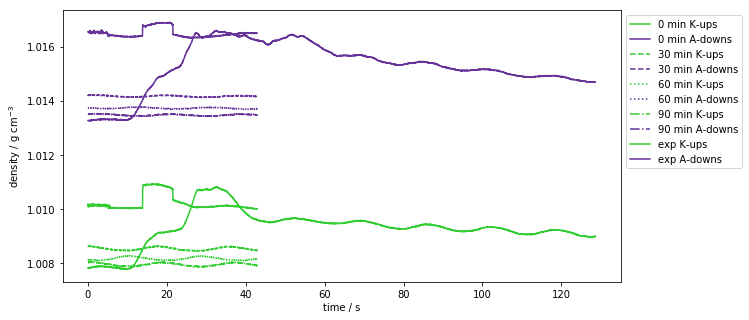

In [4]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

labelsK = ['0 min K-ups','30 min K-ups','60 min K-ups','90 min K-ups','exp K-ups']
labelsA = ['0 min A-downs','30 min A-downs','60 min A-downs','90 min A-downs','exp A-downs']

colors = ['limegreen','rebeccapurple']

filepaths = ['../../exp_18feb19/right_after_filling_18feb19.mat',
             '../../exp_18feb19/30min_after_filling_18feb19.mat',
             '../../exp_18feb19/60min_after_filling_18feb19.mat',
             '../../exp_18feb19/90min_after_filling_18feb19.mat',
             '../../exp_18feb19/exp_18feb19_read.mat']
lines = ['-','--',':','-.','-']

for filepath, line, labK, labA in zip(filepaths, lines, labelsK, labelsA):
    print(filepath)

    mat = sio.loadmat(filepath, squeeze_me=True)
    PK = dens_K(mat['ch1'])
    PA = dens_A(mat['ch2'])

    time = mat['time']
    ax0.plot(time,PK,linestyle=line ,label=labK, color=colors[0])
    ax0.plot(time,PA,linestyle=line, label=labA, color=colors[1])

ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')


### Experiment

../../exp_18feb19/exp_18feb19_read.mat


Text(0.5,0,'time / s')

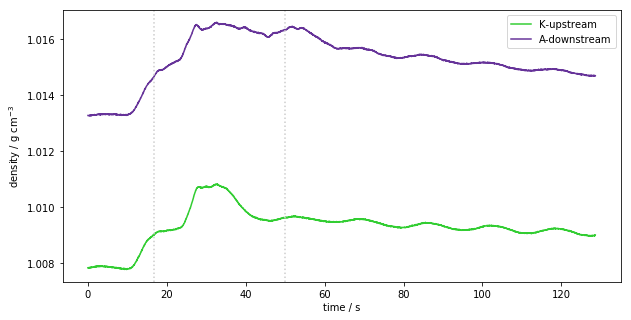

In [10]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)
labels = ['K-upstream','A-downstream']

filepath = '../../exp_18feb19/exp_18feb19_read.mat'
print(filepath)
    
mat = sio.loadmat(filepath, squeeze_me=True)
PK = mat['ch1']
PA = mat['ch2']

time = mat['time']
ax0.plot(time,dens_K(PK),'-', label=labels[0], color=colors[0])
ax0.plot(time,dens_A(PA),'-', label=labels[1], color=colors[1])

plot_uprofile(ax0)

ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')

Text(0.5,1,'Probe density minus initial density')

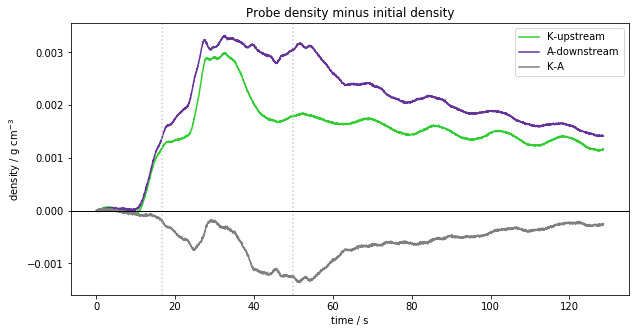

In [13]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

ax0.plot(time,dens_K(PK)-dens_K(PK)[0],'-', label=labels[0], color=colors[0])
ax0.plot(time,dens_A(PA)-dens_A(PA)[0],'-', label=labels[1], color=colors[1])
ax0.plot(time,dens_K(PK)-dens_K(PK)[0]-(dens_A(PA)-dens_A(PA)[0]),'-', label='K-A', color='0.5')
plot_uprofile(ax0)
ax0.axhline(0,color='k', linewidth=1)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density')
